In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [5]:
df.rename(columns = {'[US dollar ]':'USD','Period\\Unit:':'Time'}, inplace=True)

In [6]:
df.Time = pd.to_datetime(df.Time)

In [7]:
df.sort_values('Time', inplace=True)

In [8]:
df.reset_index(inplace=True, drop=True)

In [9]:
euro_to_dollar = df[['Time','USD']].copy()

In [10]:
euro_to_dollar

,Time,USD
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
5694,2021-01-04,1.2296
5695,2021-01-05,1.2271
5696,2021-01-06,1.2338
5697,2021-01-07,1.2276


In [11]:
euro_to_dollar['USD'].value_counts()

USD
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: count, Length: 3528, dtype: int64

In [12]:
euro_to_dollar = euro_to_dollar[euro_to_dollar.USD != '-']

In [13]:
euro_to_dollar['USD'] = euro_to_dollar['USD'].astype(float)

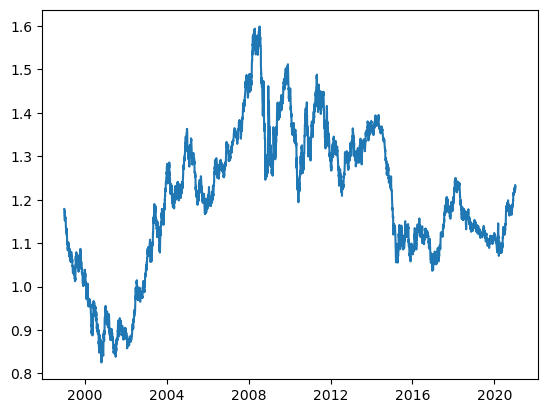

In [14]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['USD'])
plt.show()

In [15]:
euro_to_dollar['USD'].rolling(7).mean().head(8)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6    1.167171
7    1.166529
Name: USD, dtype: float64

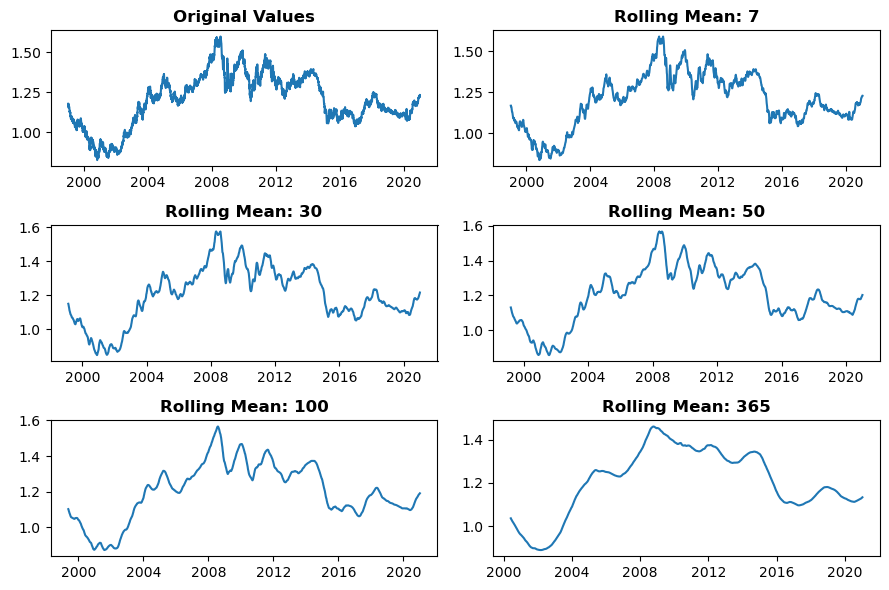

In [16]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['USD'])
plt.title('Original Values', weight='bold')

for i, r_mean in zip(range(2,7), [7,30,50,100,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['USD'].rolling(r_mean).mean())
    plt.title('Rolling Mean: ' + str(r_mean), weight='bold')
plt.tight_layout()

In [17]:
euro_to_dollar["rolling_mean"] = euro_to_dollar['USD'].rolling(30).mean()
euro_to_dollar

,Time,USD,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


# Let's Visualize the data of financial crisis occured in 2007-2008

In [18]:
financial_crisis = euro_to_dollar[(euro_to_dollar.Time.dt.year >= 2006) & (euro_to_dollar.Time.dt.year <= 2009 )]
financial_crisis_7_8 = euro_to_dollar[(euro_to_dollar.Time.dt.year >= 2007) & (euro_to_dollar.Time.dt.year <= 2008 )]

In [19]:
import matplotlib.style as style
style.use('fivethirtyeight')

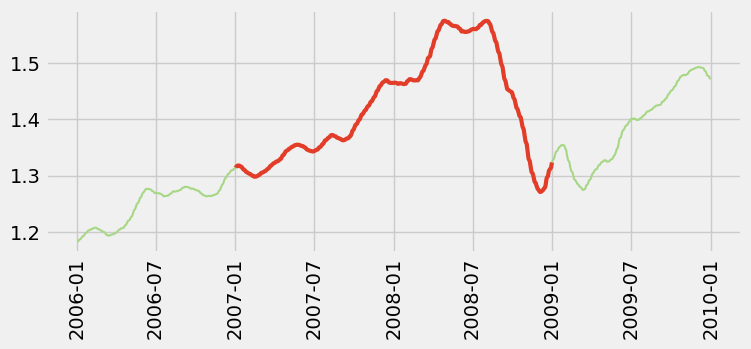

In [20]:
# Adding a plot
fig, ax = plt.subplots(figsize = (8,3))

ax.plot(financial_crisis.Time, financial_crisis['rolling_mean'], linewidth = 1.5, color='#a6d785')

#Let's highlight the 2007-2008 period
ax.plot(financial_crisis_7_8.Time, financial_crisis_7_8['rolling_mean'], linewidth = 3, color='#e23d28')

plt.xticks(rotation=90)

plt.show()

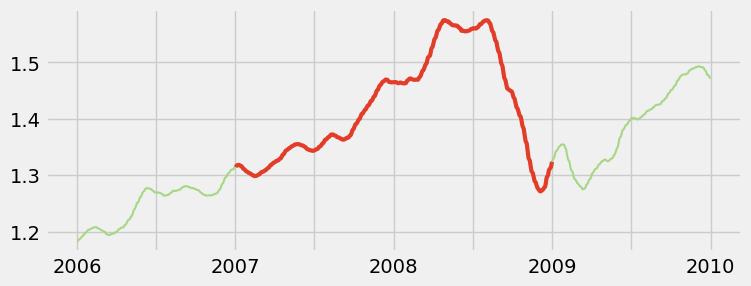

In [21]:
fig, ax = plt.subplots(figsize = (8,3))

ax.plot(financial_crisis.Time, financial_crisis['rolling_mean'], linewidth = 1.5, color='#a6d785')
ax.plot(financial_crisis_7_8.Time, financial_crisis_7_8['rolling_mean'], linewidth = 3, color='#e23d28')

#plt.xticks(rotation=90)
ax.set_xticklabels(['2006','','2007','','2008','','2009','','2010'])

plt.show()

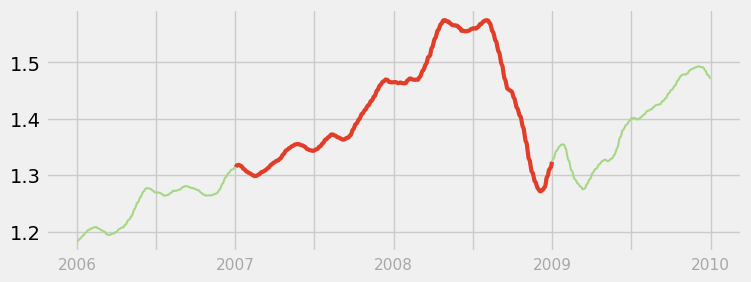

In [22]:
fig, ax = plt.subplots(figsize = (8,3))

ax.plot(financial_crisis.Time, financial_crisis['rolling_mean'], linewidth = 1.5, color='#a6d785')
ax.plot(financial_crisis_7_8.Time, financial_crisis_7_8['rolling_mean'], linewidth = 3, color='#e23d28')

#plt.xticks(rotation=90)
ax.set_xticklabels(['2006','','2007','','2008','','2009','','2010'], alpha=0.3, fontdict={'fontsize':11})

plt.show()

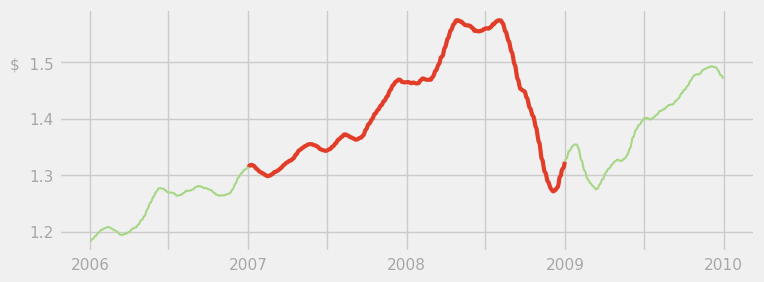

In [23]:
fig, ax = plt.subplots(figsize = (8,3))

ax.plot(financial_crisis.Time, financial_crisis['rolling_mean'], linewidth = 1.5, color='#a6d785')
ax.plot(financial_crisis_7_8.Time, financial_crisis_7_8['rolling_mean'], linewidth = 3, color='#e23d28')

#plt.xticks(rotation=90)
ax.set_xticklabels(['2006','','2007','','2008','','2009','','2010'], alpha=0.3, fontdict={'fontsize':11})
ax.set_yticklabels(['','1.2','1.3','1.4','$  1.5'], alpha=0.3, fontdict={'fontsize':11})
plt.show()

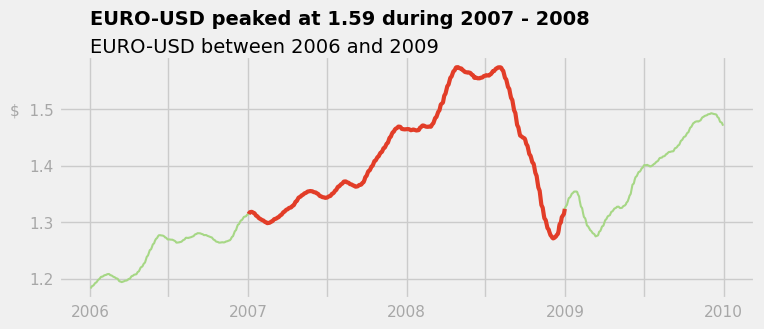

In [24]:
fig, ax = plt.subplots(figsize = (8,3))

ax.plot(financial_crisis.Time, financial_crisis['rolling_mean'], linewidth = 1.5, color='#a6d785')
ax.plot(financial_crisis_7_8.Time, financial_crisis_7_8['rolling_mean'], linewidth = 3, color='#e23d28')

#plt.xticks(rotation=90)
ax.set_xticklabels(['2006','','2007','','2008','','2009','','2010'], alpha=0.3, fontdict={'fontsize':11})
ax.set_yticklabels(['','1.2','1.3','1.4','$  1.5'], alpha=0.3, fontdict={'fontsize':11})

# Adding a title and a subtitle
ax.text(pd.to_datetime('2006-01-1'), 1.65, 'EURO-USD peaked at 1.59 during 2007 - 2008', weight='bold')
ax.text(pd.to_datetime('2006-01-1'), 1.6, 'EURO-USD between 2006 and 2009')
plt.show()

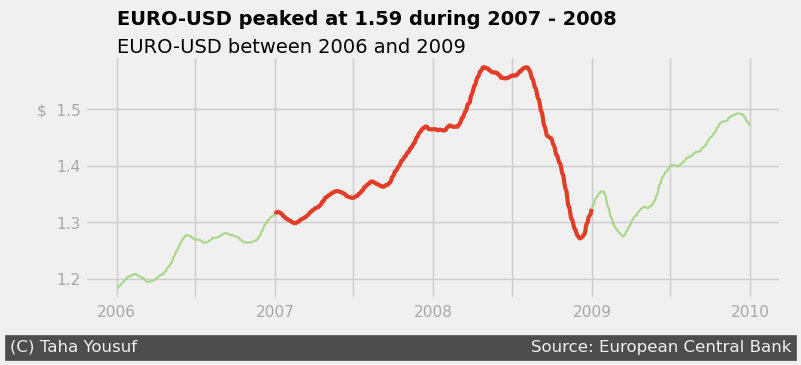

In [25]:
fig, ax = plt.subplots(figsize = (8,3))

ax.plot(financial_crisis.Time, financial_crisis['rolling_mean'], linewidth = 1.5, color='#a6d785')
ax.plot(financial_crisis_7_8.Time, financial_crisis_7_8['rolling_mean'], linewidth = 3, color='#e23d28')

#plt.xticks(rotation=90)
ax.set_xticklabels(['2006','','2007','','2008','','2009','','2010'], alpha=0.3, fontdict={'fontsize':11})
ax.set_yticklabels(['','1.2','1.3','1.4','$  1.5'], alpha=0.3, fontdict={'fontsize':11})

ax.text(pd.to_datetime('2006-01-1'), 1.65, 'EURO-USD peaked at 1.59 during 2007 - 2008', weight='bold')
ax.text(pd.to_datetime('2006-01-1'), 1.6, 'EURO-USD between 2006 and 2009')

#Adding a signature
ax.text(pd.to_datetime('2005-4-30'), 1.07, '(C) Taha Yousuf'+ ' '*75 + 'Source: European Central Bank', color = '#f0f0f0', backgroundcolor = '#4d4d4d',size=12)

plt.show()

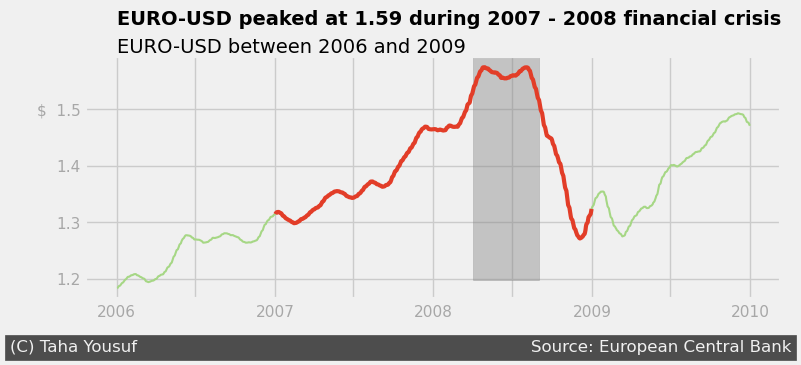

In [26]:
fig, ax = plt.subplots(figsize = (8,3))

ax.plot(financial_crisis.Time, financial_crisis['rolling_mean'], linewidth = 1.5, color='#a6d785')
ax.plot(financial_crisis_7_8.Time, financial_crisis_7_8['rolling_mean'], linewidth = 3, color='#e23d28')

#plt.xticks(rotation=90)
ax.set_xticklabels(['2006','','2007','','2008','','2009','','2010'], alpha=0.3, fontdict={'fontsize':11})
ax.set_yticklabels(['','1.2','1.3','1.4','$  1.5'], alpha=0.3, fontdict={'fontsize':11})

ax.text(pd.to_datetime('2006-01-1'), 1.65, 'EURO-USD peaked at 1.59 during 2007 - 2008 financial crisis', weight='bold')
ax.text(pd.to_datetime('2006-01-1'), 1.6, 'EURO-USD between 2006 and 2009')

ax.text(pd.to_datetime('2005-4-30'), 1.07, '(C) Taha Yousuf'+ ' '*75 + 'Source: European Central Bank', color = '#f0f0f0', backgroundcolor = '#4d4d4d',size=12)
ax.axvspan(xmin =pd.to_datetime('2008-04-1'), xmax=pd.to_datetime('2008-09-1'), color='grey', alpha=0.4, ymin=0.08)

plt.show()

# Now let's Visualize Covid 19 Period

In [27]:
corona_crisis_20 = euro_to_dollar.loc[(euro_to_dollar['Time'] >= '2020-01-01') & (euro_to_dollar['Time'] <= '2021-12-31')]
corona_crisis = euro_to_dollar.loc[(euro_to_dollar['Time'] >= '2016-01-01') & (euro_to_dollar['Time'] <= '2019-12-31')]

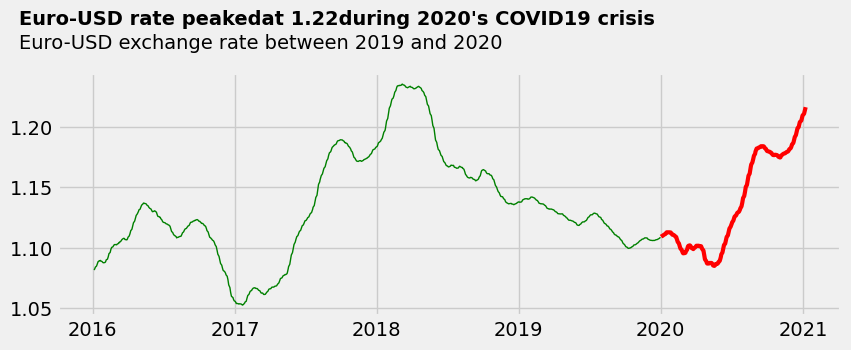

In [28]:
import matplotlib.style as style
style.use('fivethirtyeight')

# Adding the plot
fig, ax = plt.subplots (figsize=(9, 3))
ax.plot(corona_crisis [ 'Time'], corona_crisis['rolling_mean'], linewidth =1, color='green')

# Highlighting the 2007-2008 period
ax.plot(corona_crisis_20[ 'Time'], corona_crisis_20['rolling_mean'], linewidth =3, color='red')

#Adding a title and subtitle
ax.text(-.05, 1.2, "Euro-USD rate peakedat 1.22during 2020's COVID19 crisis", weight="bold", transform = plt.gca().transAxes)
ax.text(-.05, 1.1, "Euro-USD exchange rate between 2019 and 2020 ",  transform = plt.gca().transAxes)

plt.show()

# The Three US President Example

In [29]:
bush_obama_trump = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year >= 2021)]
bush = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year <= 2009)]
obama = euro_to_dollar.copy()[(euro_to_dollar.Time.dt.year >= 2009) & (euro_to_dollar.Time.dt.year <= 2017)]
trump = euro_to_dollar.copy()[(euro_to_dollar.Time.dt.year >= 2017) & (euro_to_dollar.Time.dt.year <= 2021)]

Below, you'll notice we used matplotlib's functional approach to build the graph. We use 
this approach beacuse it offers more flexibility in arranging the subplots:
    1) We first build three of the graphs on a 2-by-3 grid(this grid should have six subplots, but we only build three, the bottom row remains empty)
    2) We then build only the bottom graph of a 2-by-1  grid (this grid should have two subplots, The top row remains empty)
    3) The two grids are merged and we end up with three graphs on the top row and one graph on the bottom row.

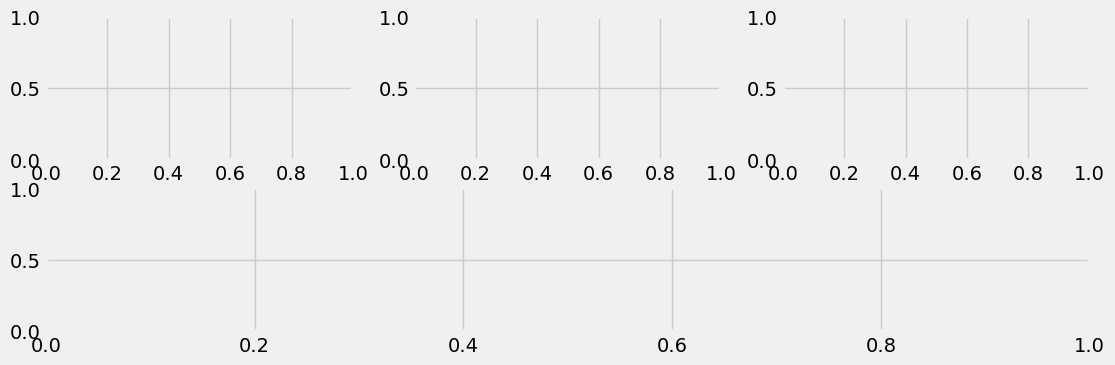

In [30]:
# Adding the FiveThirtyEight style
style.use('fivethirtyeight')
#Adding the sublpots
plt.figure(figsize=(12, 6))
#pattern1
ax1 = plt.subplot(3,3,1) #row,col, index
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
#pattern 2
ax4 = plt.subplot(3,1,2) #row,col, index

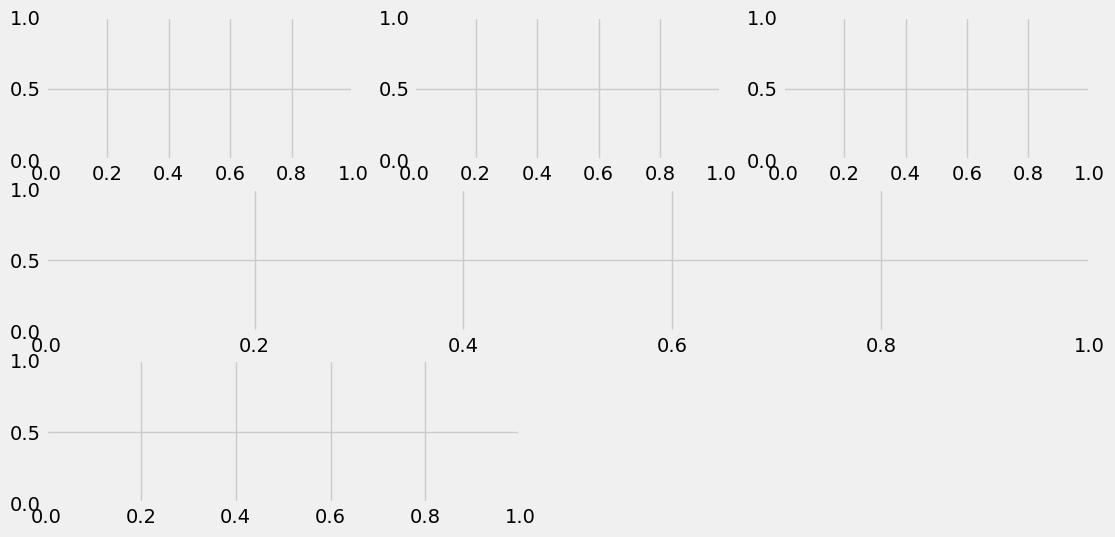

In [31]:
# Adding the FiveThirtyEight style
style.use('fivethirtyeight')
#Adding the sublpots
plt.figure(figsize=(12, 6))
#pattern1
ax1 = plt.subplot(3,3,1) #row,col, index
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
#pattern 2
ax4 = plt.subplot(3,1,2) #row,col, index
#pattern 3
ax5 = plt.subplot(3,2,5) #row,col, index

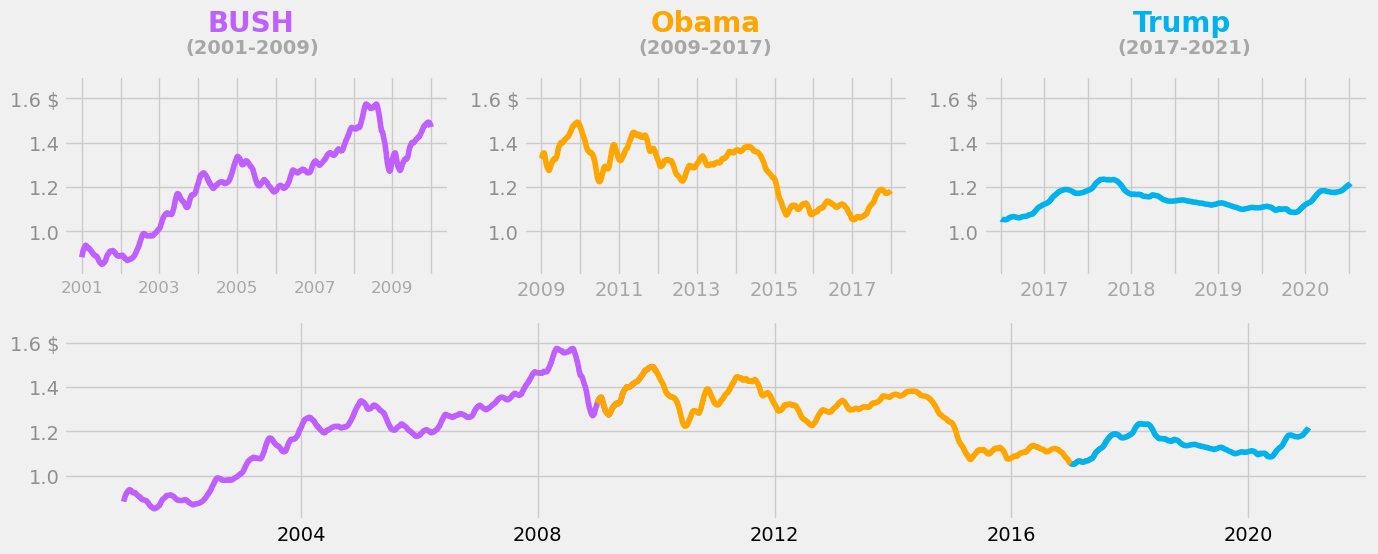

In [32]:
# Adding the FiveThirtyEight style
style.use('fivethirtyeight')
# Adding the subplots
plt.figure(figsize=(14, 8))

# Pattern 1: 
ax1 = plt.subplot(3, 3, 1)
ax2 = plt.subplot(3, 3, 2)
ax3 = plt.subplot(3, 3, 3)
# Pattern 2
ax4 = plt.subplot(3, 1, 2)
axes = [ax1, ax2, ax3, ax4]
# Adjusting each subplot as needed
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6 $'], alpha=0.4)

# Ax1: Bush
ax1.plot(bush[ 'Time'], bush[ 'rolling_mean'], color='#BF5FFF')
ax1.set_xticklabels([" ", '2001', '', '2003'," ",'2005', " ",'2007'," ", '2009'], alpha=0.3, size=12)
ax1.text(0.11, 2.45, 'BUSH', fontsize=20, weight='bold', color='#BF5FFF', transform = plt.gca().transAxes)
ax1.text(0.093, 2.34, '(2001-2009)', weight='bold', alpha=0.3, transform = plt.gca().transAxes)

# Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='#ffa500')
ax2.set_xticklabels([" ", '2009', " ", '2011', " ", '2013', " ", '2015', " ", '2017'], alpha=0.3)
ax2.text(0.45, 2.45, 'Obama', fontsize=20, weight='bold', color='#ffa500', transform = plt.gca().transAxes)
ax2.text(0.44, 2.34, '(2009-2017)', weight='bold', alpha=0.3, transform = plt.gca().transAxes)

# Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='#00B2EE')
ax3.set_xticklabels([" ", '2017', " ", '2018', " ", '2019', " ", '2020', " ", '2021'], alpha=0.3)
ax3.text(0.82, 2.45, 'Trump', fontsize=20, weight='bold', color='#00B2EE', transform = plt.gca().transAxes)
ax3.text(0.808, 2.34, '(2017-2021)', weight='bold', alpha=0.3, transform = plt.gca().transAxes)

# Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'], color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'], color='#00B2EE')

plt.tight_layout()
plt.show()